In [ ]:
# change date:960127

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
addres='C:\\python\\Tutorial\\Kaggle\\Resturant_Revenue Pred\\'

In [55]:
trainData = pd.read_csv(addres+'train.csv')
testData = pd.read_csv(addres+'test.csv')
trainData = trainData.drop('Id', axis=1)
testData = testData.drop('Id', axis=1)

In [5]:
trainData.head()


,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [56]:
testData.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [29]:
# just send a test file on the kaggle to be calculated and test first 
testSubmit=pd.DataFrame({'ID':testData.index,'Prediction':np.random.randint(1000,100000,len(testData))})
testSubmit.to_csv('testSubmit.csv',index=False)

### convert to date and calculate shop opened 

In [57]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')   
testData['Open Date'] = pd.to_datetime(testData['Open Date'], format='%m/%d/%Y')

trainData['OpenDays']=""
testData['OpenDays']=""

#create a dummy df to calculate days opend from 01/01/2015
dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(testData)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y')  

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
testData['OpenDays'] = dateLastTest['Date'] - testData['Open Date']

#convert open days to int
trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)
testData['OpenDays'] = testData['OpenDays'].astype('timedelta64[D]').astype(int)

trainData = trainData.drop('Open Date', axis=1)
testData = testData.drop('Open Date', axis=1)




In [9]:
trainData.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,5647
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,2513
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,663
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,1064
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,2063


###  convert categorical to dummy vars 

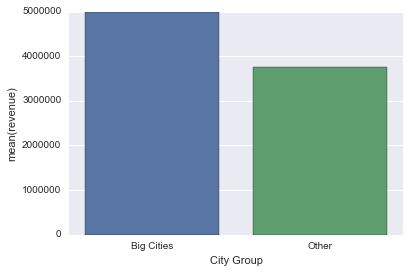

In [59]:
#city group
cityPerc = trainData[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=cityPerc)

citygroupDummy = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(citygroupDummy)

citygroupDummyTest = pd.get_dummies(testData['City Group'])
testData = testData.join(citygroupDummyTest)

trainData = trainData.drop('City Group', axis=1)
testData = testData.drop('City Group', axis=1)

In [7]:

print(trainData['Type'].value_counts())

print(testData['Type'].value_counts())

FC    76
IL    60
DT     1
Name: Type, dtype: int64
FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64


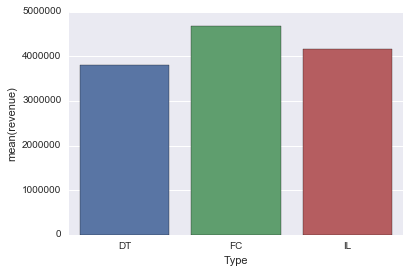

In [50]:
#Skip this for moment maybe in futrue add this
#Type to dummy
TypePer=trainData[['Type','revenue']].groupby(['Type'],as_index=False).mean()

sns.barplot(x='Type',y='revenue',data=TypePer)

In [52]:
trainData=trainData[trainData['Type']!='DT']
trainData['Type'].value_counts()

FC    76
IL    60
Name: Type, dtype: int64

In [53]:
typeDummy=pd.get_dummies(trainData['Type'])
trainData=trainData.join(typeDummy)

trainData=trainData.drop('Type',axis=1)
trainData.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other,FC,IL
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,5,4,3,4,5653753.0,5647,1.0,0.0,0.0,1.0
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,6923131.0,2513,1.0,0.0,1.0,0.0
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,2055379.0,663,0.0,1.0,0.0,1.0
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,18,12,12,6,2675511.0,1064,0.0,1.0,0.0,1.0
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,3,4,3,3,4316715.0,2063,0.0,1.0,0.0,1.0


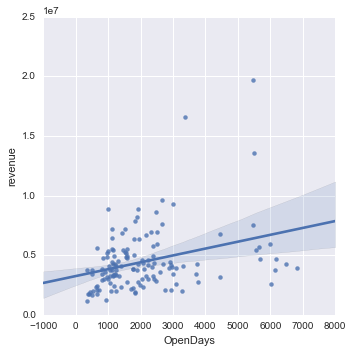

In [59]:
sns.lmplot(x='OpenDays',y='revenue',data=trainData)

### feature Selection


In [32]:
#load packages

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [8]:
X_features=trainData.columns.drop(['City','revenue','Type'])
y_features='revenue'

X_train=trainData[X_features]

y_train=trainData[y_features]

X_train , X_test , y_train, y_test = train_test_split(X_train, y_train ,  test_size=0.33, random_state=42 )


# Create a random forestregressor
cls = RandomForestRegressor(n_estimators=150)

# Train the classifier
cls.fit(X_train, y_train)

cls.score(X_test, y_test)


0.050800748309834165

In [ ]:
# Print the name and gini importance of each feature
for feature in zip(X_features,np.round( 100*cls.feature_importances_,0) ):
    print(feature)

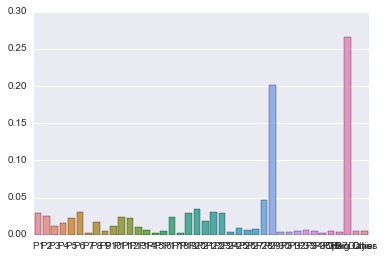

In [22]:
sns.barplot(x=X_features,y=clf.feature_importances_)

In [23]:
#Select features that more than 5% effect
X_features[cls.feature_importances_*100 >5]

Index([u'P12', u'P17', u'P28', u'P29', u'OpenDays'], dtype='object')

In [26]:
# use selected features
X_features=['P12','P17','P28','P29','OpenDays']
y_features='revenue'

X_train=trainData[X_features]
y_train=trainData[y_features]

X_train , X_test , y_train, y_test = train_test_split(X_train, y_train ,  test_size=0.33, random_state=0 )


# Create a random forestregressor
cls = RandomForestRegressor(n_estimators=150)

# Train the classifier
cls.fit(X_train, y_train)

cls.score(X_test, y_test)

-0.15017187285772837

In [27]:
# convert to log opendays and revenue

X_features=['P12','P17','P28','P29','OpenDays']
y_features='revenue'

X_train=trainData[X_features]
X_train['OpenDays']=X_train['OpenDays'].apply(np.log)

y_train=trainData[y_features]
y_train=y_train.apply(np.log)

X_train , X_test , y_train, y_test = train_test_split(X_train, y_train ,  test_size=0.33, random_state=42 )


# Create a random forestregressor
cls = RandomForestRegressor(n_estimators=150)

# Train the classifier
cls.fit(X_train, y_train)

cls.score(X_test, y_test)

C:\Users\Hossein\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-0.043562115033805915

In [29]:
testData.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Big Cities,Other
0,Niğde,FC,1,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,1440,0.0,1.0
1,Konya,IL,3,4.0,4.0,4.0,2,2,5,3,...,0,0,0,0,0,0,0,1385,0.0,1.0
2,Ankara,FC,3,4.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,0,0,428,1.0,0.0
3,Kocaeli,IL,2,4.0,4.0,4.0,2,3,5,4,...,4,0,0,0,0,0,0,605,0.0,1.0
4,Afyonkarahisar,FC,2,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,519,0.0,1.0


In [32]:
X_Test=testData[X_features]

pred=cls.predict(X_Test)
pred=np.exp(pred)

In [33]:
pred2=[]

for i in range(len(pred)):
    if pred[i] != float('inf'):
        pred2.append(pred[i])

m=sum(pred2) / float(len(pred2))

for i in range(len(pred)):
    if pred[i] == float('inf'):
        print('haha')
        pred[i] = m        

In [34]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple.csv',header=True, index=False)

# feature selection based on coorelation to response variable

In [30]:
features=[]

for i in [col for col in trainData.columns if col not in ['revenue','City','Type'] ]:

    if type(trainData[i][0])==np.int64 or  type(trainData[i][0])==np.float64:
        tmp=trainData["revenue"].corr(trainData[i])
        if np.fabs(tmp)>0.1:
            features.append(i)

In [46]:
features

['P2', 'P6', 'P13', 'P28', 'P29', 'Big Cities', 'Other', 'OpenDays']

In [48]:

features.append('OpenDays')
X_train=trainData[features]
X_train['OpenDays']=X_train['OpenDays'].apply(np.log)

y_train=trainData['revenue']
y_train=y_train.apply(np.log)

X_train , X_test , y_train, y_test = train_test_split(X_train, y_train ,  test_size=0.33, random_state=42 )


# Create a random forestregressor
cls = RandomForestRegressor(n_estimators=150)

# Train the classifier
cls.fit(X_train, y_train)

cls.score(X_test, y_test)

C:\Users\h.mortazavi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.15214106072819333

In [60]:
X_Test=testData[features]

pred=cls.predict(X_Test)
pred=np.exp(pred)

In [61]:
pred2=[]

for i in range(len(pred)):
    if pred[i] != float('inf'):
        pred2.append(pred[i])

m=sum(pred2) / float(len(pred2))

for i in range(len(pred)):
    if pred[i] == float('inf'):
        print('haha')
        pred[i] = m   

In [62]:
testData = pd.read_csv(addres+"test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple3.csv',header=True, index=False)

In [54]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
Id            100000 non-null int64
Open Date     100000 non-null object
City          100000 non-null object
City Group    100000 non-null object
Type          100000 non-null object
P1            100000 non-null int64
P2            100000 non-null float64
P3            100000 non-null float64
P4            100000 non-null float64
P5            100000 non-null int64
P6            100000 non-null int64
P7            100000 non-null int64
P8            100000 non-null int64
P9            100000 non-null int64
P10           100000 non-null int64
P11           100000 non-null int64
P12           100000 non-null int64
P13           100000 non-null float64
P14           100000 non-null int64
P15           100000 non-null int64
P16           100000 non-null int64
P17           100000 non-null int64
P18           100000 non-null int64
P19           100000 non-null int64
P20           

In [25]:
trainData.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,4,5,5,4,3,4,5653753.0,5647,1.0,0.0
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,6923131.0,2513,1.0,0.0
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,2055379.0,663,0.0,1.0
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,10,6,18,12,12,6,2675511.0,1064,0.0,1.0
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,3,2,3,4,3,3,4316715.0,2063,0.0,1.0
